In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
prices = pd.read_csv('prices.csv')
wind = pd.read_csv('wind_power_cleaned.csv')
grid_excess = pd.read_csv('grid_excess.csv')

In [19]:
prices['date'] = pd.to_datetime(prices['date'])
wind['date'] = pd.to_datetime(wind['date'])

In [20]:
data = pd.merge(prices, wind, on=['date', 'hour'], how='outer')

#select every 18th day and save that to a new dataframe
data['date'] = pd.to_datetime(data['date'])
data

,date,hour,price,wind power
0,2023-01-01,0,2.01,114.776290
1,2023-01-01,1,1.38,117.265806
2,2023-01-01,2,0.09,117.016935
3,2023-01-01,3,0.08,113.002903
4,2023-01-01,4,0.05,108.146613
...,...,...,...,...
8756,2023-12-31,20,34.89,83.135484
8757,2023-12-31,21,29.60,72.667742
8758,2023-12-31,22,28.67,69.600000
8759,2023-12-31,23,26.87,72.667742


In [21]:
#fill nan values with the most recent value
data['wind power'] = data['wind power'].fillna(method='ffill')

C:\Users\janle\AppData\Local\Temp\ipykernel_24220\3486741652.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['wind power'] = data['wind power'].fillna(method='ffill')


In [22]:
#get a list of every 18th day in 2023
selected_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='19D')

In [23]:
#select every 18th day
scenarios_price = {}
scenarios_wind = {}
i=1
for date in selected_dates:
    scenarios_price[i] = prices[prices['date'] == date].reset_index(drop=True).drop(columns=['date', 'hour'])
    scenarios_wind[i] = wind[wind['date'] == date].reset_index(drop=True).drop(columns=['date', 'hour'])
    i+=1

In [32]:
scenarios_wind_df = pd.DataFrame()
for key in scenarios_wind:
    scenarios_wind_df[key]=scenarios_wind[key]['wind power']

In [33]:
scenarios_wind_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,114.776290,64.397419,31.935597,72.383710,144.367581,51.546613,31.444968,21.359581,95.045161,41.843387,17.904935,92.743548,66.631290,81.966613,49.619032,102.642258,151.992419,22.337242,52.239516,15.778419
1,117.265806,65.745806,29.810661,70.615323,146.095645,45.133871,34.361290,17.627581,95.083226,37.184839,14.389693,86.184193,62.685484,84.408226,46.197742,105.772419,143.459194,18.609871,48.240000,14.820387
2,117.016935,66.184355,26.081339,64.311613,146.817903,36.183065,34.861129,15.520210,102.244516,35.290484,11.485500,86.597581,56.905645,89.993548,45.116290,108.439516,142.586774,15.949935,51.149032,16.245968
3,113.002903,68.079032,26.188710,50.042419,145.968226,29.920419,42.039516,15.687871,103.875484,26.789113,9.385548,86.425323,45.898064,79.869677,45.990323,91.405968,146.618387,13.469581,50.954194,21.937903
4,108.146613,67.271613,29.417048,30.706000,142.492903,26.749306,46.991290,13.684113,100.089839,13.576855,8.193597,83.624194,39.361290,67.004194,43.074194,75.780645,150.135968,9.242903,48.711290,20.196032
5,109.434839,68.490161,34.753032,26.704694,138.551290,25.562919,46.091290,6.538097,100.234193,10.595290,7.841935,76.078387,45.957903,51.194194,39.978871,61.308065,151.101613,5.908274,43.341935,19.268613
6,104.349194,73.088387,39.358710,34.998065,145.069032,21.579887,43.650323,3.912145,98.578427,10.433968,7.662935,62.563065,48.470323,42.296290,40.913064,48.278548,145.926935,4.519484,41.643387,17.511322
7,103.625806,70.643710,49.265000,58.674516,147.471129,10.527790,47.518387,6.318161,101.974516,13.341064,7.711258,51.864194,47.922742,38.555323,40.538710,35.350903,143.261129,2.733911,37.583226,17.589597
8,103.569839,66.540806,57.900968,70.174355,147.725968,12.722387,52.517903,11.046871,106.932581,19.462226,7.908081,43.736290,49.915968,35.708871,39.468710,25.439984,142.278710,1.103897,33.662742,18.876742
9,104.884516,68.425484,66.425645,75.266613,146.945000,19.166693,64.439032,12.637242,111.288710,25.728968,8.196710,37.720968,55.955161,29.322951,36.494194,23.913387,142.215323,0.977411,33.993065,18.812710


In [9]:
#make 20 times 20 times 2 scenarios
scenarios = {}
i=1
for price in scenarios_price:
    for wind in scenarios_wind:
        for grid in grid_excess:
            df = pd.merge(scenarios_price[price], scenarios_wind[wind], left_index=True, right_index=True)
            #add column with grid excess
            df['grid_excess'] = grid_excess[grid]
            scenarios[i] = df
            i+=1

In [10]:
#make a dataframe with all scenarios
scenarios_df = pd.DataFrame()
for scenario in scenarios:
    scenarios_df = pd.concat([scenarios_df, scenarios[scenario]], axis=1)

In [11]:
scenarios_df

,price,wind power,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess,price,...,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess
0,2.01,114.776290,1,2.01,114.776290,0,2.01,114.776290,1,2.01,...,1,0.00,15.778419,1,0.00,15.778419,0,0.00,15.778419,1
1,1.38,117.265806,0,1.38,117.265806,0,1.38,117.265806,0,1.38,...,0,0.00,14.820387,0,0.00,14.820387,0,0.00,14.820387,0
2,0.09,117.016935,0,0.09,117.016935,1,0.09,117.016935,1,0.09,...,1,0.00,16.245968,0,0.00,16.245968,1,0.00,16.245968,1
3,0.08,113.002903,0,0.08,113.002903,1,0.08,113.002903,1,0.08,...,1,0.00,21.937903,0,0.00,21.937903,1,0.00,21.937903,1
4,0.05,108.146613,1,0.05,108.146613,1,0.05,108.146613,0,0.05,...,0,0.00,20.196032,1,0.00,20.196032,1,0.00,20.196032,0
5,0.00,109.434839,1,0.00,109.434839,0,0.00,109.434839,1,0.00,...,1,0.00,19.268613,1,0.00,19.268613,0,0.00,19.268613,1
6,0.00,104.349194,1,0.00,104.349194,1,0.00,104.349194,1,0.00,...,1,0.02,17.511322,1,0.02,17.511322,1,0.02,17.511322,1
7,0.00,103.625806,0,0.00,103.625806,0,0.00,103.625806,1,0.00,...,1,16.06,17.589597,0,16.06,17.589597,0,16.06,17.589597,1
8,0.00,103.569839,0,0.00,103.569839,0,0.00,103.569839,0,0.00,...,0,38.20,18.876742,0,38.20,18.876742,0,38.20,18.876742,0
9,0.04,104.884516,1,0.04,104.884516,1,0.04,104.884516,1,0.04,...,1,38.75,18.812710,1,38.75,18.812710,1,38.75,18.812710,1


In [12]:
#save as csv
scenarios_df.to_csv('scenarios.csv', index=False)

In [13]:
in_sample_list = pd.read_csv('../Task1/in_sample_scenarios.csv', header=None)[0].tolist()

In [14]:
wind_data = pd.DataFrame()
price_data = pd.DataFrame()
grid_excess_data = pd.DataFrame()

for scenario in in_sample_list:
    scenario = int(scenario)
    wind_data[scenario] = scenarios[scenario]['wind power']
    price_data[scenario] = scenarios[scenario]['price']
    grid_excess_data[scenario] = scenarios[scenario]['grid_excess']

C:\Users\janle\AppData\Local\Temp\ipykernel_30172\2044310086.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wind_data[scenario] = scenarios[scenario]['wind power']
C:\Users\janle\AppData\Local\Temp\ipykernel_30172\2044310086.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  price_data[scenario] = scenarios[scenario]['price']
C:\Users\janle\AppData\Local\Temp\ipykernel_30172\2044310086.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [15]:
grid_excess_data

,626,705,1070,230,631,469,54,1121,697,393,...,242,591,447,153,268,1045,4,91,470,1064
0,0,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,0,0,0,0,1,1
4,1,0,1,1,1,1,0,1,1,0,...,1,0,0,0,1,1,1,1,1,1
5,0,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,0,0
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,0,1,0,0,0,0,1,0,0,1,...,0,1,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


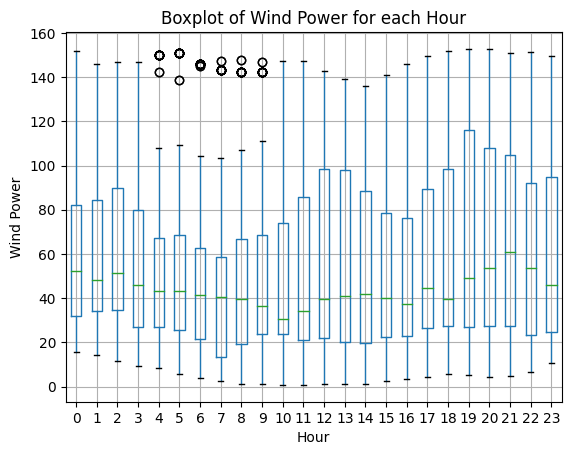

In [16]:
# make a boxplot for each hour of the wind power
fig, ax = plt.subplots()
wind_data.T.boxplot(ax=ax)
ax.set_ylabel('Wind Power')
ax.set_xlabel('Hour')
plt.title('Boxplot of Wind Power for each Hour')
#plt.savefig('wind_power_boxplot.png')
plt.show()

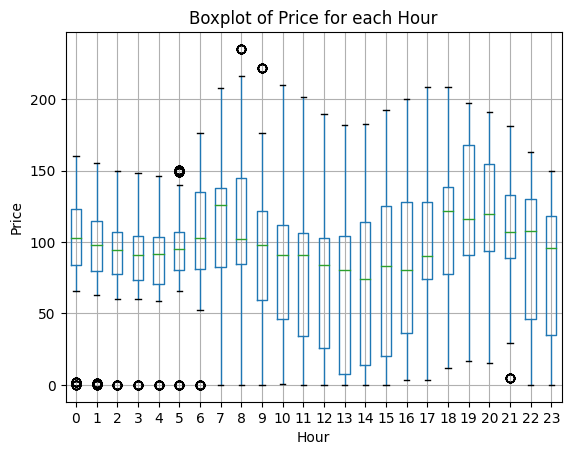

In [17]:
#same plot for price
fig, ax = plt.subplots()
price_data.T.boxplot(ax=ax)
ax.set_ylabel('Price')
ax.set_xlabel('Hour')
plt.title('Boxplot of Price for each Hour')
#plt.savefig('price_boxplot.png')
plt.show()

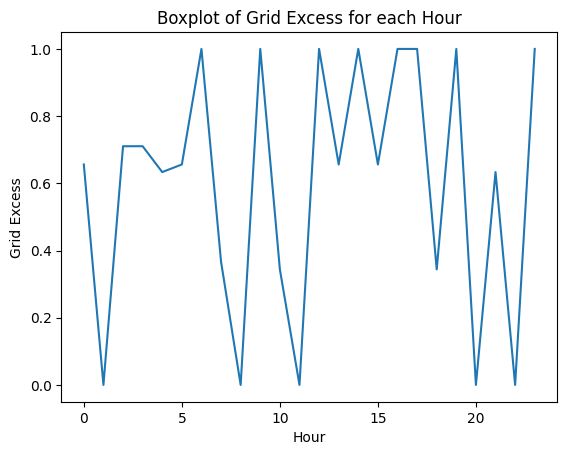

In [18]:
#same for grid excess
fig, ax = plt.subplots()
grid_excess_data.T.mean().plot(ax=ax)
ax.set_ylabel('Grid Excess')
ax.set_xlabel('Hour')
plt.title('Boxplot of Grid Excess for each Hour')
#plt.savefig('grid_excess_boxplot.png')
plt.show()
